# Univariate Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df=pd.read_csv("pokemon.csv")

In [3]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
df.shape

(807, 14)

In [5]:
df.dtypes

id                   int64
species             object
generation_id        int64
height             float64
weight             float64
base_experience      int64
type_1              object
type_2              object
hp                   int64
attack               int64
defense              int64
speed                int64
special-attack       int64
special-defense      int64
dtype: object

In [6]:
df['generation_id']=df['generation_id'].astype(str)

In [7]:
df.dtypes

id                   int64
species             object
generation_id       object
height             float64
weight             float64
base_experience      int64
type_1              object
type_2              object
hp                   int64
attack               int64
defense              int64
speed                int64
special-attack       int64
special-defense      int64
dtype: object

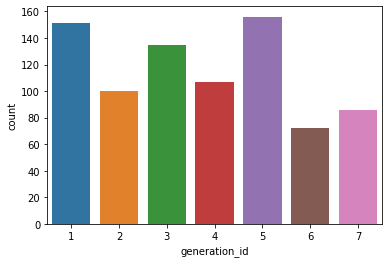

In [8]:
sns.countplot(data=df, x="generation_id");

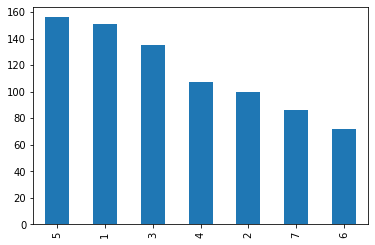

In [9]:
df.generation_id.value_counts().plot(kind="bar");

In [10]:
base_color=sns.color_palette()[3]

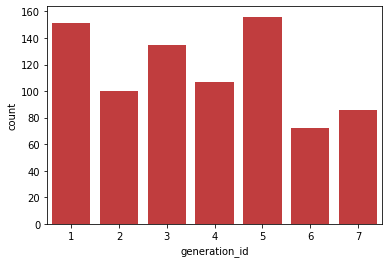

In [11]:
sns.countplot(data=df, x="generation_id", color=base_color);

In [12]:
#to have all these in order
gen_order=df['generation_id'].value_counts().index

In [13]:
gen_order

Index(['5', '1', '3', '4', '2', '7', '6'], dtype='object')

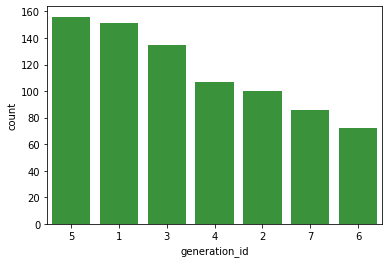

In [14]:
sns.countplot(data=df, x='generation_id', color=sns.color_palette()[2],order=gen_order);

In [15]:
#lets visualize another qualitative data i.e. type and we will start with type 1
#lets select our base color
base_color=sns.color_palette()[3]

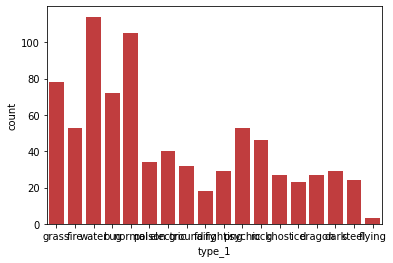

In [16]:
sns.countplot(data=df, x="type_1", color=base_color);

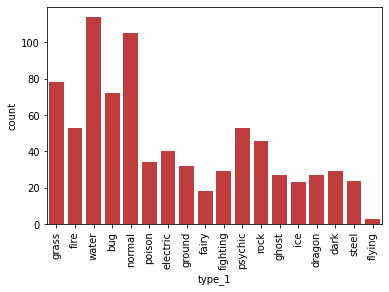

In [17]:
#we need to reduce the label crowding by rotating the values
sns.countplot(data=df, x="type_1", color=base_color);
plt.xticks(rotation=90);

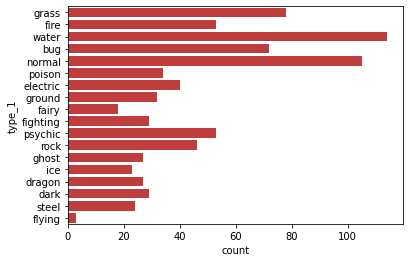

In [18]:
#or simply make a horizontal bar chart buy changing the x to y
sns.countplot(data=df, y="type_1", color=base_color,);

In [19]:
order_ = df['type_1'].value_counts().index

In [20]:
order_

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

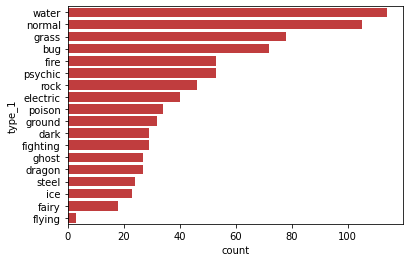

In [21]:
sns.countplot(data=df, y="type_1", color=base_color,order=order_);

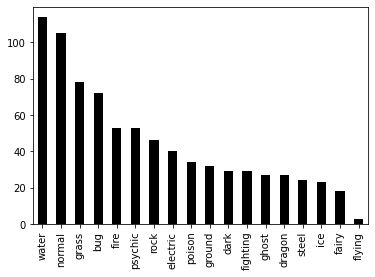

In [22]:
df['type_1'].value_counts().plot(kind='bar',color='black');

In [23]:
df

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


In [24]:
pkmn_types=df.melt(id_vars=['id','species'],var_name="type_level",value_name="type",value_vars=['type_1','type_2']).dropna()

In [25]:
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [26]:
pkmn_types.rename(columns={'species':'identifier'},inplace=True)

In [27]:
pkmn_types.head()

,id,identifier,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [28]:
type_counts=pkmn_types['type'].value_counts()

In [29]:
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [30]:
type_order=type_counts.index

In [31]:
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

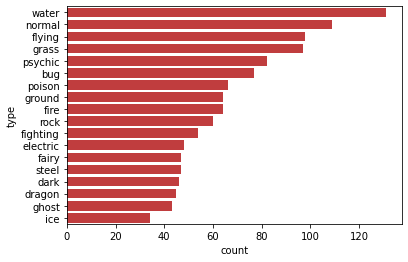

In [32]:
sns.countplot(data=pkmn_types,y="type",color=sns.color_palette()[3],order=type_order);

### Absolute vs Relative Freq

In [33]:
n_pokemon=df.shape[0]

In [34]:
n_pokemon

807

In [35]:
max_type_count=type_counts[0]

In [36]:
max_type_count

131

In [37]:
max_prop=max_type_count/n_pokemon

In [38]:
max_prop

0.1623296158612144

In [39]:
tick_props=np.arange(0,max_prop,0.02)

In [40]:
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [41]:
tick_names=['{:.2f}'.format(v) for v in tick_props]

In [42]:
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

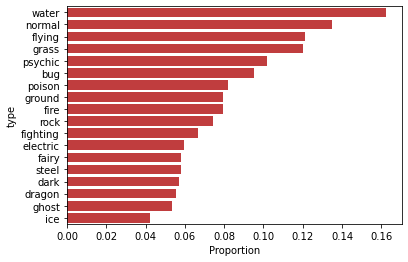

In [43]:
sns.countplot(data=pkmn_types,y="type",color=sns.color_palette()[3],order=type_order);
plt.xticks(tick_props * n_pokemon,tick_names);
plt.xlabel('Proportion');

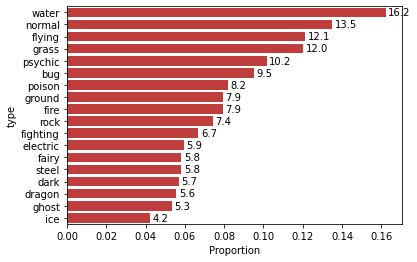

In [44]:
sns.countplot(data=pkmn_types,y="type",color=sns.color_palette()[3],order=type_order);
plt.xticks(tick_props * n_pokemon,tick_names);
plt.xlabel('Proportion');

for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

In [45]:
#counting missing data
df2=pd.read_csv("sales-data.csv")

In [46]:
df2.sample(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
5719,32,29/07/2011,75.91,3.547,NaN,NaN,NaN,NaN,NaN,193.711525,8.622,False
3447,19,17/05/2013,52.54,3.790,11529.47,581.88,11.42,2496.68,5104.96,NaN,NaN,False
2983,17,17/06/2011,56.61,3.704,NaN,NaN,NaN,NaN,NaN,129.043200,6.774,False
5797,32,25/01/2013,40.40,2.872,4609.18,1969.26,1.20,29.07,1937.03,200.815099,7.107,False
5722,32,19/08/2011,73.72,3.499,NaN,NaN,NaN,NaN,NaN,194.250063,8.622,False
1027,6,04/05/2012,77.66,3.749,13643.53,266.00,117.27,5455.98,2773.56,223.280054,5.964,False
1767,10,27/07/2012,83.98,3.769,9511.34,NaN,8.87,16376.33,3062.22,130.719581,7.170,False
101,1,13/01/2012,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,7.348,False
393,3,27/08/2010,86.15,2.619,NaN,NaN,NaN,NaN,NaN,214.889794,7.346,False
4626,26,22/07/2011,69.52,3.882,NaN,NaN,NaN,NaN,NaN,135.873839,7.767,False


In [47]:
df2.shape

(8190, 12)

In [48]:
df2[df2.isnull()]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df2.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [50]:
na_counts=df2.drop(['Date','Temperature','Fuel_Price'],axis=1)

In [51]:
na_counts=na_counts.isna().sum()

In [52]:
na_counts

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [53]:
na_counts.index.values

array(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'], dtype=object)

In [54]:
na_counts.shape

(9,)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


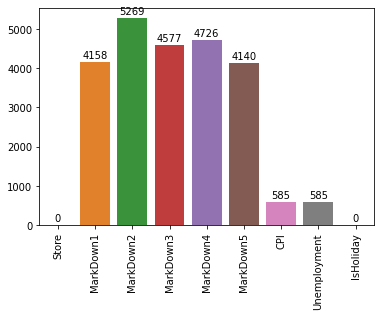

In [55]:
sns.barplot(na_counts.index.values,na_counts);
plt.xticks(rotation=90);

for i in range (na_counts.shape[0]):
    count=na_counts[i]
    plt.text(i,count+300,count,ha="center",va='top')

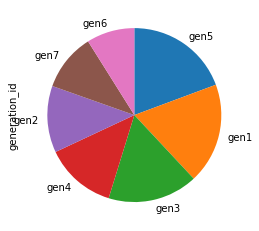

In [77]:
df.generation_id.value_counts().plot(kind='pie',startangle=90,counterclock=False,labels=['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6']);

In [79]:
#donut pie
sorted_values=df.generation_id.value_counts()

In [80]:
sorted_values

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

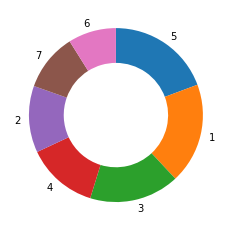

In [86]:
plt.pie(sorted_values,startangle=90,counterclock=False,labels=sorted_values.index,wedgeprops={'width':0.4});

In [88]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


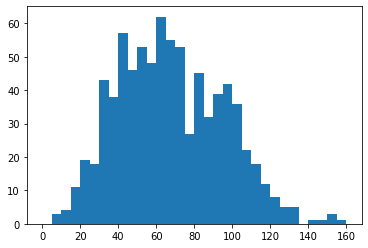

In [99]:
bins=np.arange(0,df['speed'].max()+5,5)
plt.hist(data=df,x='speed',bins=bins,);

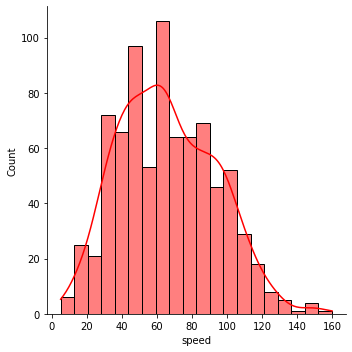

In [111]:
sns.displot(df['speed'],kde=True,bins=20,color="red");

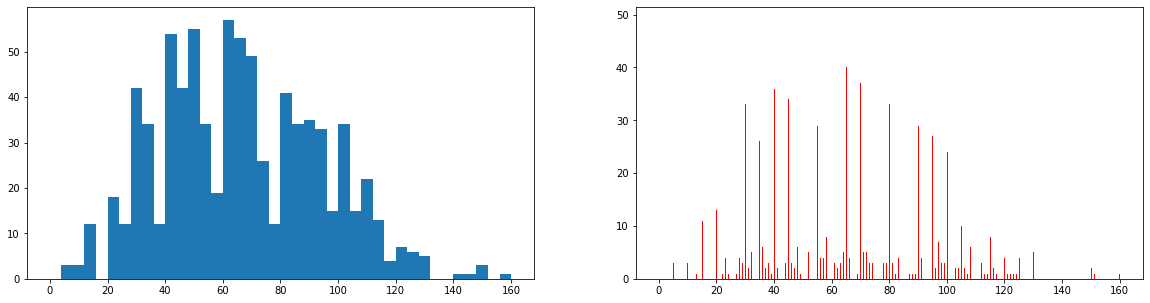

In [115]:
#plotting side by side
plt.figure(figsize=[20,5])


plt.subplot(1,2,1)
bins=np.arange(0,df.speed.max()+4,4)
plt.hist(data=df, x="speed",bins=bins);

plt.subplot(1,2,2)
bins=np.arange(0,df.speed.max()+1/4,1/4)
plt.hist(data=df,x='speed',bins=bins,color='red');

### Histogram Practice

### **TO DO Task**
Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. 

**Hint**: Try playing around with different bin width sizes to see what best depicts the data.

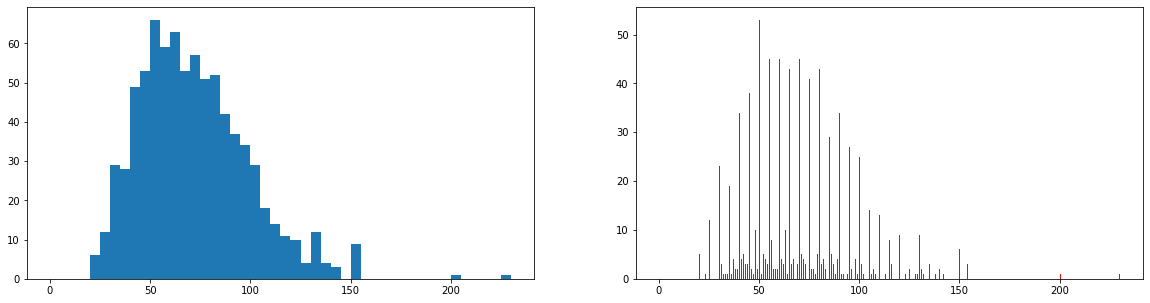

In [145]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)

bins=np.arange(0,df['special-defense'].max()+5,5)
plt.hist(data=df,x='special-defense',bins=bins);

plt.subplot(1,2,2)
bins=np.arange(0,df['special-defense'].max()+0.5,0.5)
plt.hist(data=df,x="special-defense",bins=bins,color='red');

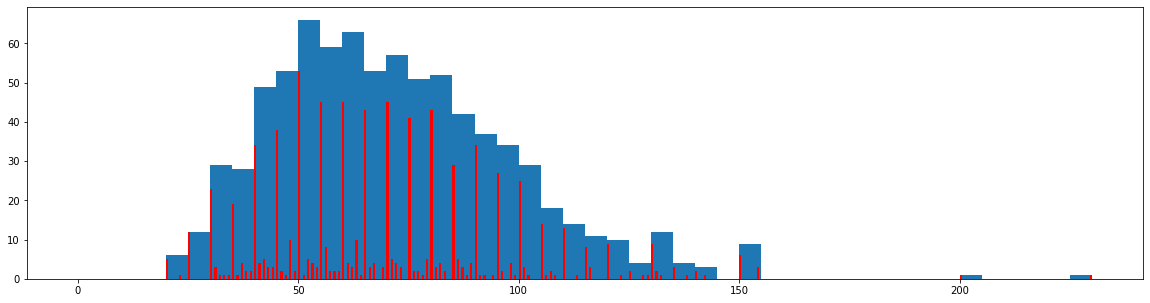

In [170]:
plt.figure(figsize=[20,5])

bins=np.arange(0,df['special-defense'].max()+5,5)
plt.hist(data=df,x='special-defense',bins=bins);
bins=np.arange(0,df['special-defense'].max()+0.5,0.5)
plt.hist(data=df,x="special-defense",bins=bins,color='red');

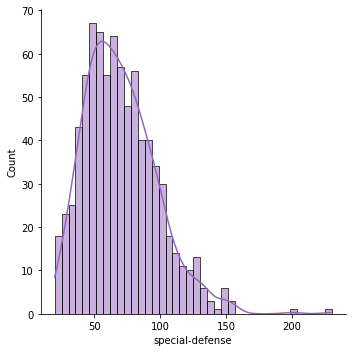

In [140]:
sns.displot(df['special-defense'],bins=40,color=sns.color_palette()[4],kde=True)

### Choosing a plot for Discrete data

In [148]:
df_rolls=pd.read_csv('die-rolls.csv')

In [149]:
df_rolls.head()

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9


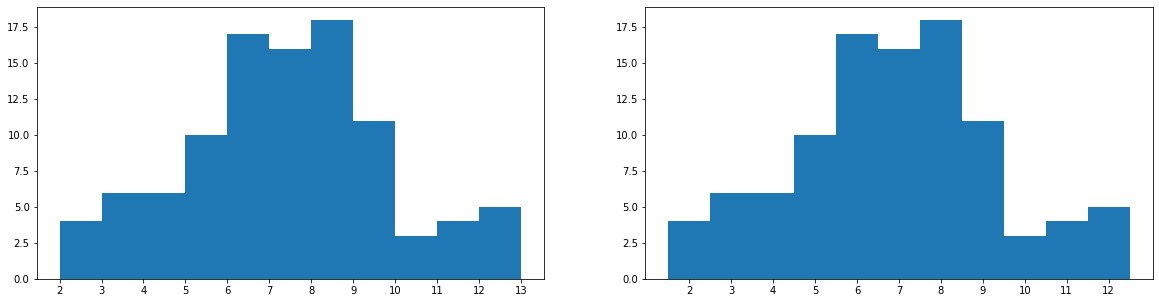

In [176]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
bin_edges=np.arange(2,12+1.1,1)
plt.hist(data=df_rolls,x="Sum",bins=bin_edges);
plt.xticks(np.arange(2,12+1.1,1));

plt.subplot(1,2,2)
bin_edges=np.arange(1.5,12+1,1)
plt.hist(data=df_rolls,x="Sum",bins=bin_edges);
plt.xticks(np.arange(2,12+1,1));

#### Managing gaps between inidvidual bars

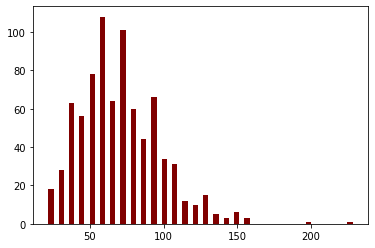

In [174]:
plt.hist(data=df,x="special-defense",bins=30,color='maroon',rwidth=0.51);

### Descriptive statistics, Ouliers and Axis Limits

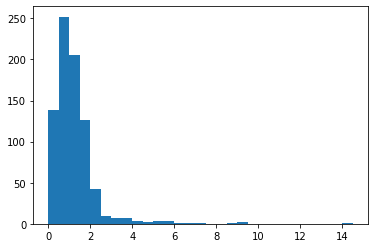

In [179]:
#histogram of height of pokemons
bins=np.arange(0,df.height.max()+0.5,0.5);
plt.hist(data=df,x="height",bins=bins);

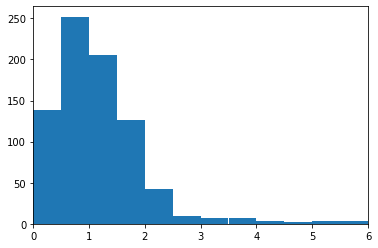

In [183]:
# we need to zoom into the axis further to investigate the data set
bins=np.arange(0,df.height.max()+0.5,0.5);
plt.hist(data=df,x="height",bins=bins);
plt.xlim((0,6));

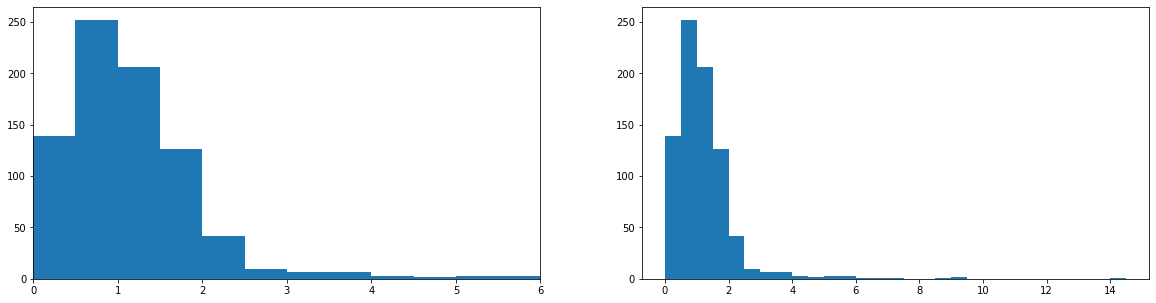

In [185]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
bins=np.arange(0,df.height.max()+0.5,0.5);
plt.hist(data=df,x="height",bins=bins);
plt.xlim((0,6));

plt.subplot(1,2,2)
bins=np.arange(0,df.height.max()+0.5,0.5);
plt.hist(data=df,x="height",bins=bins);

### Scales and Transformation

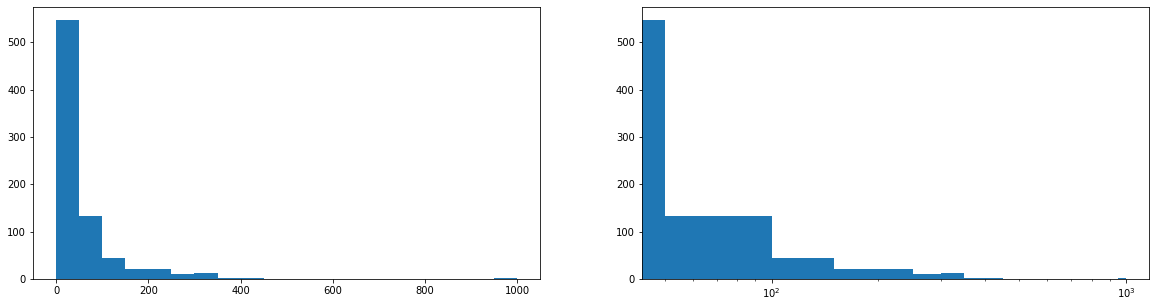

In [191]:
#weight
plt.figure(figsize=[20,5]);

plt.subplot(1,2,1)
bins=np.arange(0,df.weight.max()+50,50);
plt.hist(data=df,x="weight",bins=bins);


plt.subplot(1,2,2)
bins=np.arange(0,df.weight.max()+50,50)
plt.hist(data=df,x="weight",bins=bins)
plt.xscale('log')

In [193]:
df.weight.describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [196]:
np.log10(df.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

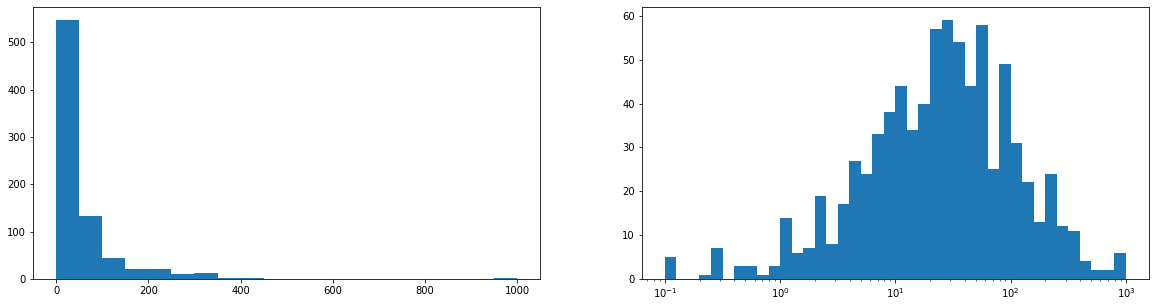

In [199]:
plt.figure(figsize=[20,5]);

plt.subplot(1,2,1)
bins=np.arange(0,df.weight.max()+50,50);
plt.hist(data=df,x="weight",bins=bins);


plt.subplot(1,2,2)
bins=10**np.arange(-1,3+0.1,0.1)
plt.hist(data=df,x="weight",bins=bins)
plt.xscale('log')

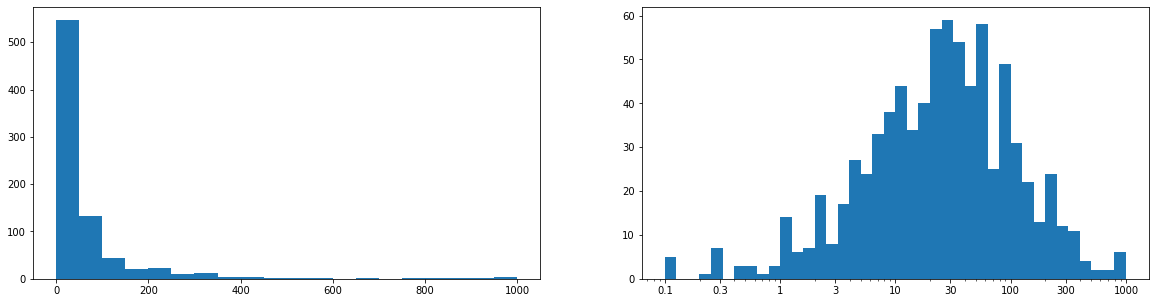

In [204]:
plt.figure(figsize=[20,5]);

plt.subplot(1,2,1)
bins=np.arange(0,df.weight.max()+50,50);
plt.hist(data=df,x="weight",bins=bins);

plt.subplot(1,2,2)
bins=10**np.arange(-1,3+0.1,0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=df,x="weight",bins=bins)
plt.xscale('log')
plt.xticks(ticks,labels);